In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df['Species'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
67,68,5.8,2.7,4.1,1.0,1
92,93,5.8,2.6,4.0,1.2,1
142,143,5.8,2.7,5.1,1.9,2
123,124,6.3,2.7,4.9,1.8,2
90,91,5.5,2.6,4.4,1.2,1


In [6]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Click on the above link to see the default parameters of decision tree in sklearn

tree = DecisionTreeClassifier()

In [11]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
# These are the libraries to install for visualizing the decision Tree

#!pip install six
#!pip install pydotplus
#!pip install graphviz

In [13]:
# Importing required packages for visualization

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

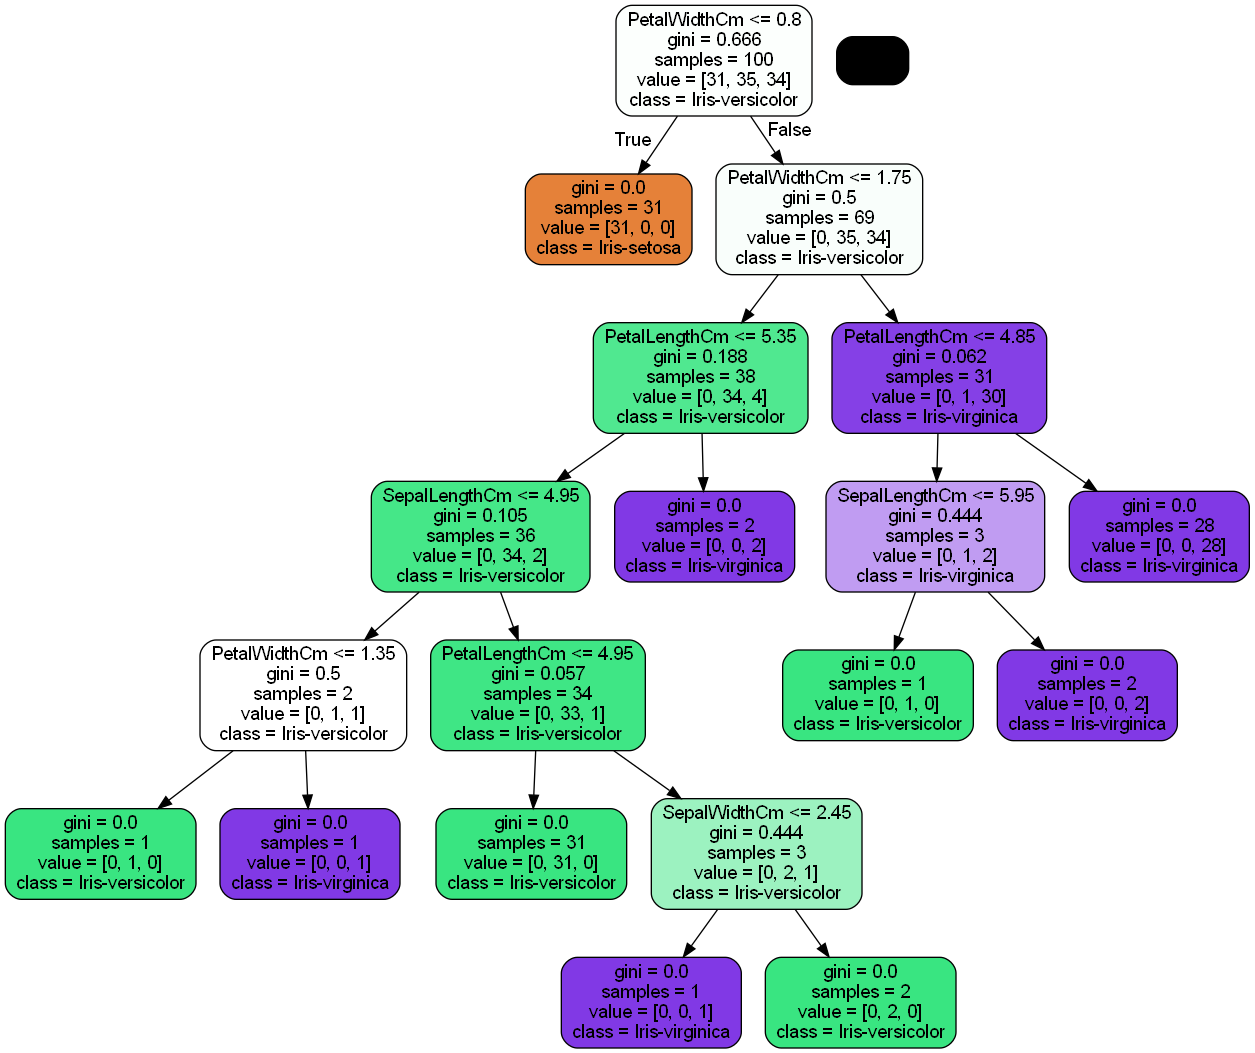

In [14]:
dot_data = StringIO()  

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#Image(graph.create_png(),width=800,height=900)

## Alternative method for Graphviz / Visualizing the Decision Tree

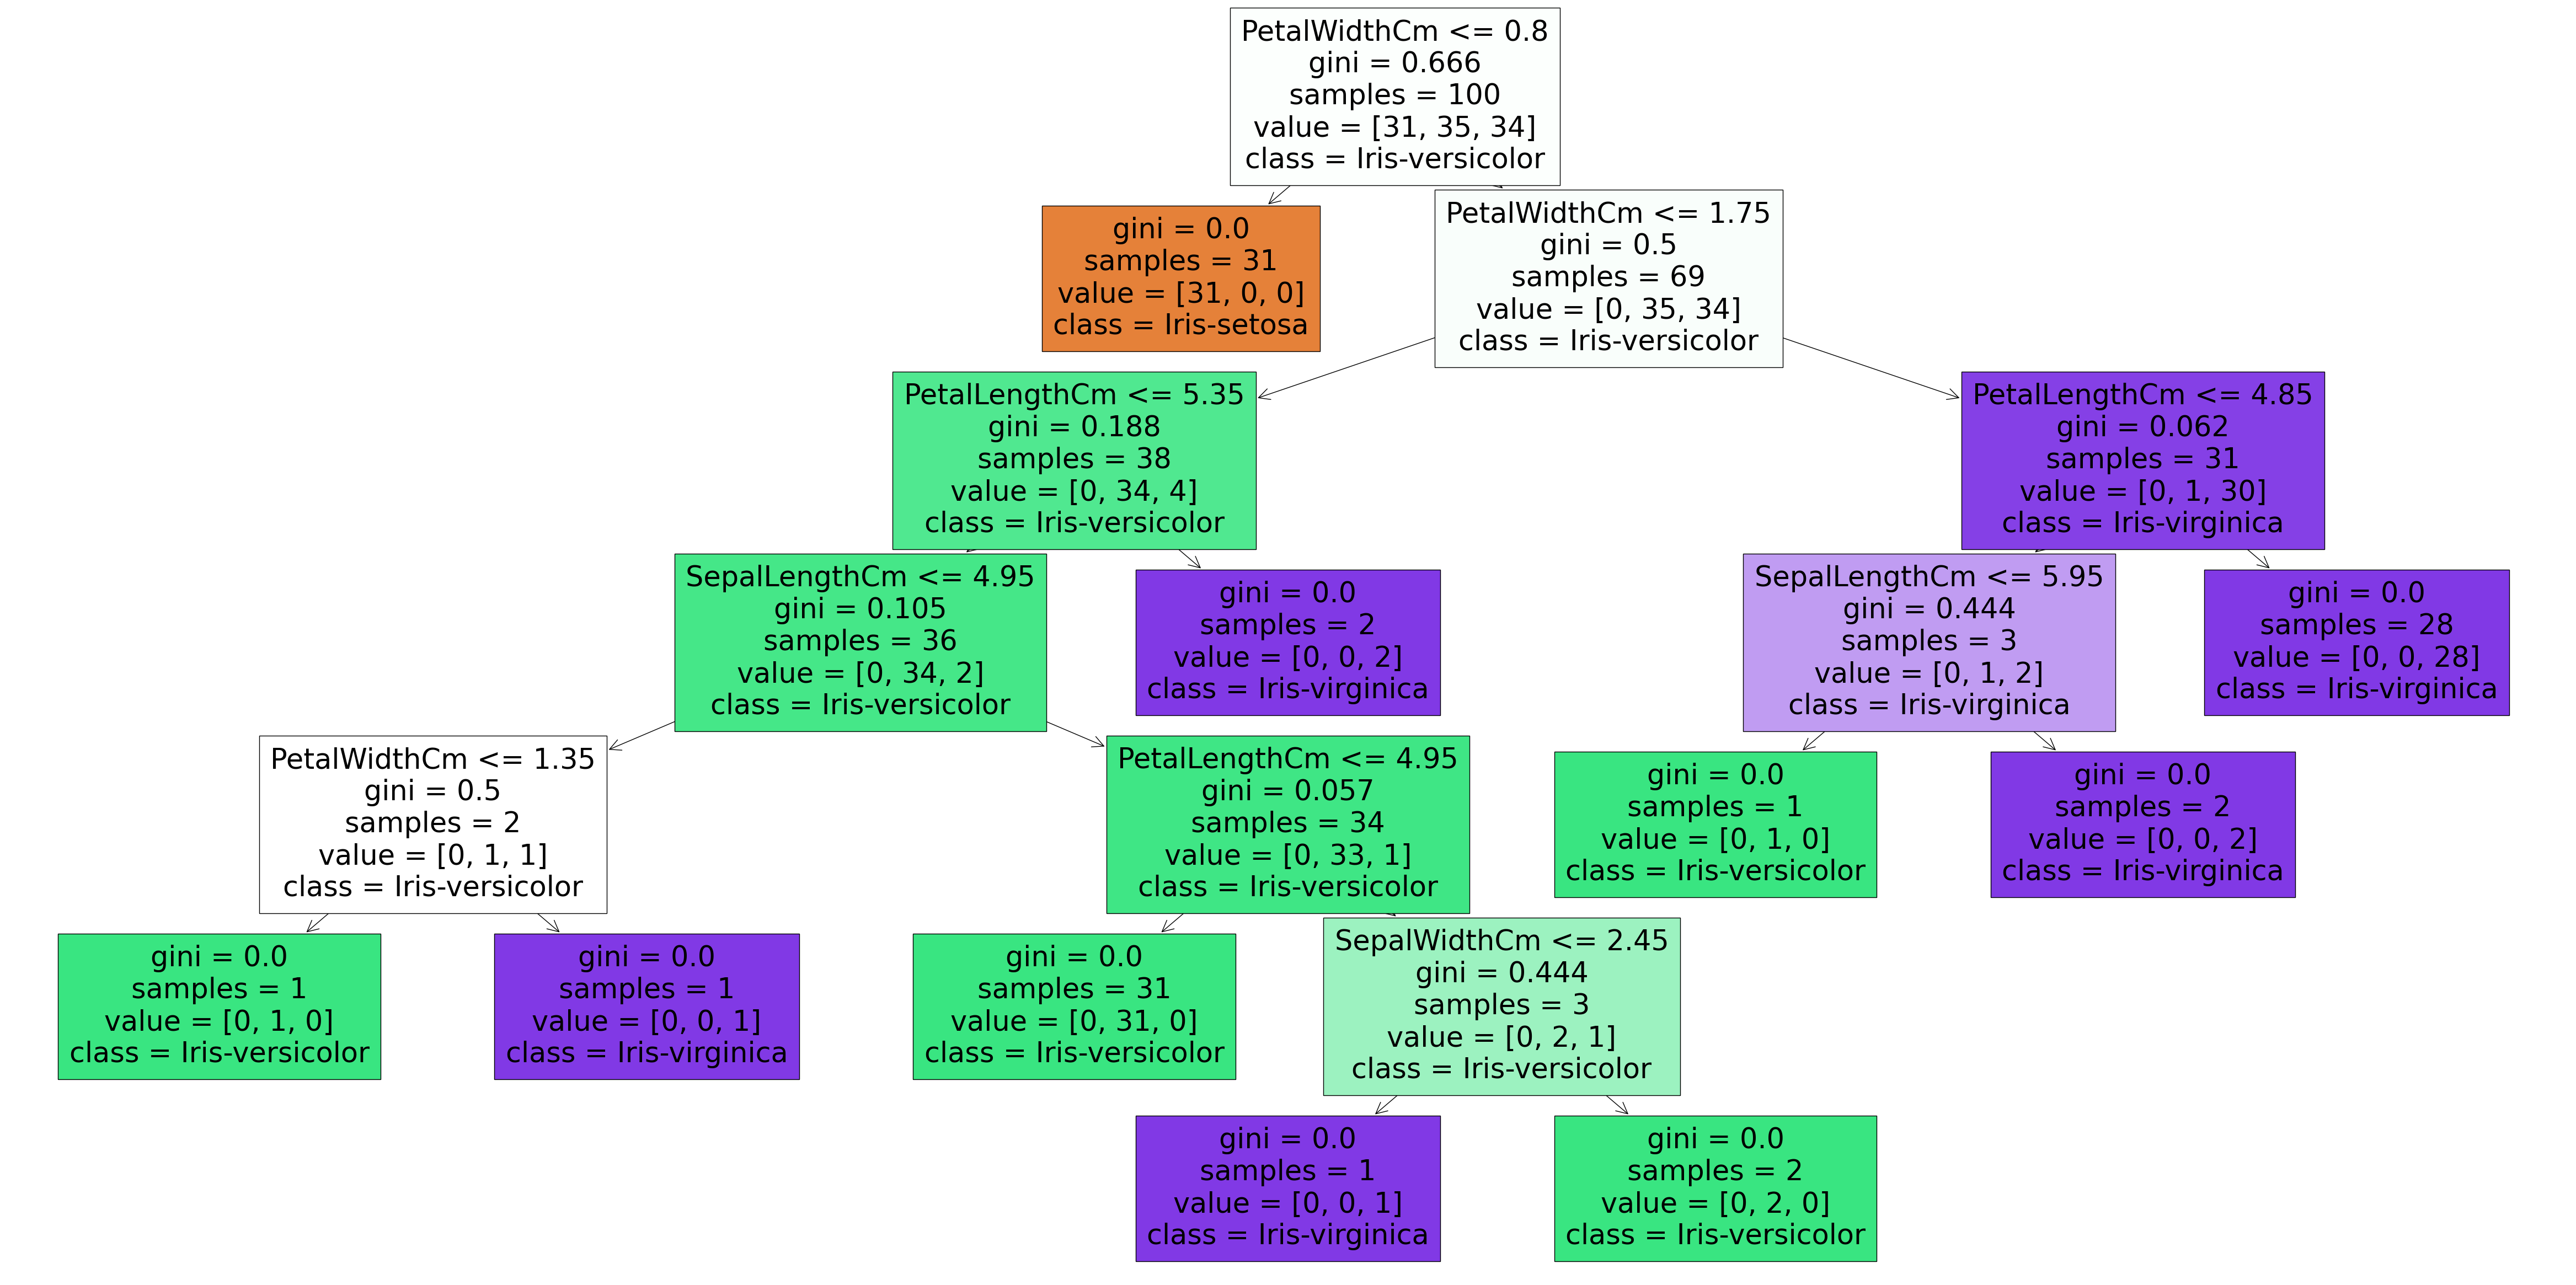

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(60,30))

plot_tree(tree, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

In [16]:
# Let's check the accuracy score and confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [17]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 1.0
Train Confusion Matrix:
[[31  0  0]
 [ 0 35  0]
 [ 0  0 34]]
--------------------------------------------------
Test Performance : 0.98
Test Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Post-Pruning Technique:-
## Post Prunning can be done by choose the best parameters and their limit manually.
## Or by taking the correct ccp_alpha value.


### ccp_alpha is a hyperparameter used in post-pruning decision trees. It specifies the parameter of minimal cost-complexity pruning, which is a post-pruning technique that removes branches of the tree that contribute less to the overall reduction of impurity while keeping the accuracy of the model.

In [18]:
# As you see in the decision tree there are so many unnecessary splits so we use max_depth parameter 

tree1 = DecisionTreeClassifier(max_depth=2)

In [19]:
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

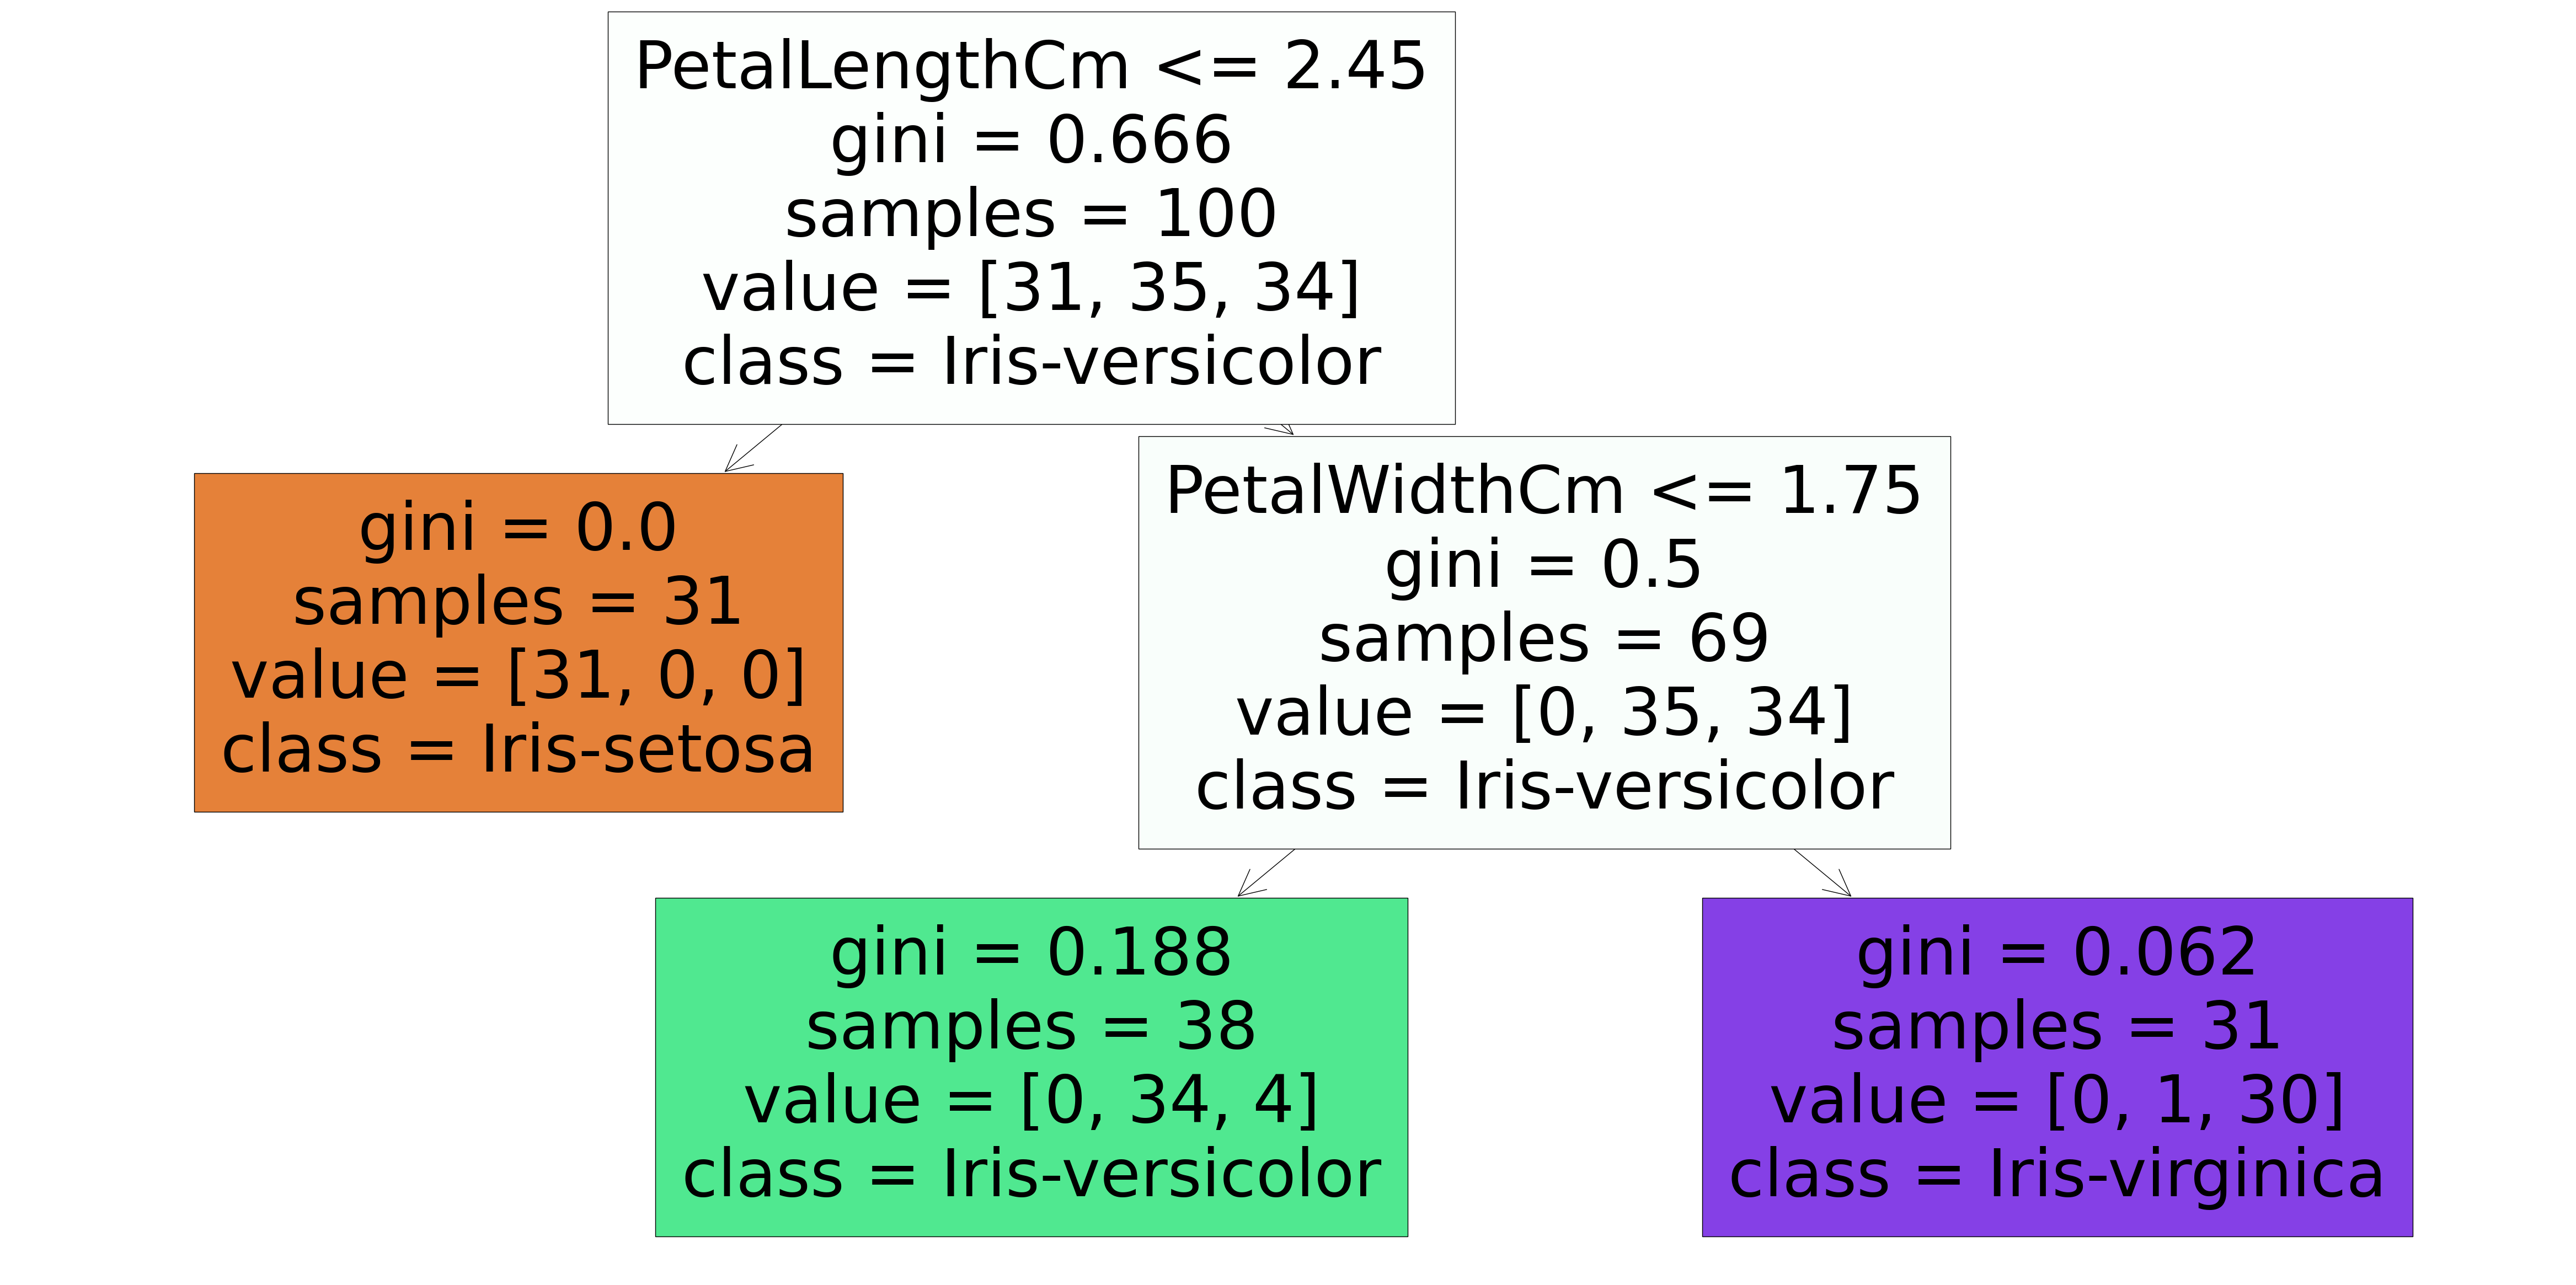

In [20]:
plt.figure(figsize=(60,30))

plot_tree(tree1, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

In [21]:
y_train_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

In [22]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 0.95
Train Confusion Matrix:
[[31  0  0]
 [ 0 34  1]
 [ 0  4 30]]
--------------------------------------------------
Test Performance : 0.98
Test Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## ccp_alpha (cost-complexity prunning)

In [23]:
path = tree1.cost_complexity_pruning_path(X_train,y_train) #pass the original data not the splitted data
ccp_alpha = path.ccp_alphas

In [24]:
path

{'ccp_alphas': array([0.        , 0.25399375, 0.32087246]),
 'impurities': array([0.09093379, 0.34492754, 0.6658    ])}

In [25]:
ccp_alpha

array([0.        , 0.25399375, 0.32087246])

In [26]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X_train,y_train)
    dt_model2.append(dt_m)

In [27]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.25399375015378556),
 DecisionTreeClassifier(ccp_alpha=0.32087246376811596)]

Text(0, 0.5, 'Accuracy Score')

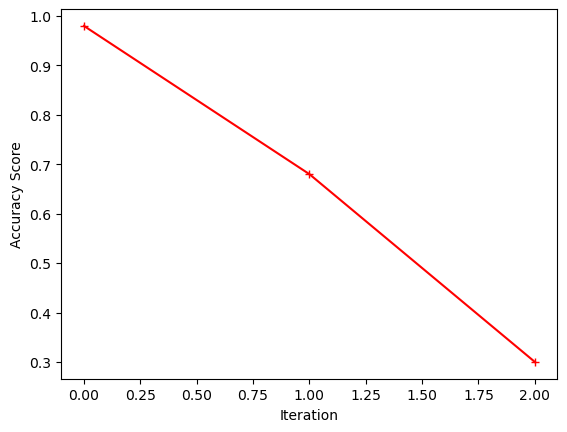

In [28]:
dt_model2 = []
score=[]
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=i)
    dt_m.fit(X_train,y_train)
    dt_model2.append(dt_m)
    score.append(dt_m.score(X_test,y_test))
    
    
plt.plot(score,'r-+')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

### Graph shows the accuracy_score of each iteration. Iteration is iterative ccp_alpha values.

In [29]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.25399375015378556),
 DecisionTreeClassifier(ccp_alpha=0.32087246376811596)]

In [30]:
train_score = [i.score(X_train,y_train) for i in dt_model2]
test_score = [i.score(X_test,y_test) for i in dt_model2]

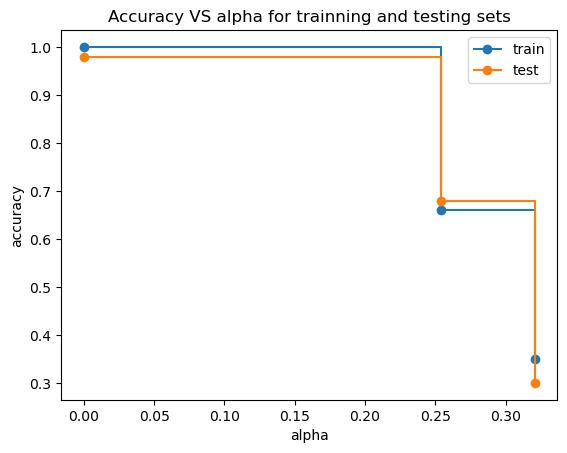

In [31]:
fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy VS alpha for trainning and testing sets')
ax.plot(ccp_alpha,train_score,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alpha,test_score,marker='o',label='test',drawstyle='steps-post')
plt.legend()
plt.show()

In [32]:
dt_model_ccp = DecisionTreeClassifier(random_state=42,ccp_alpha=0.23)
dt_model_ccp.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.23, random_state=42)

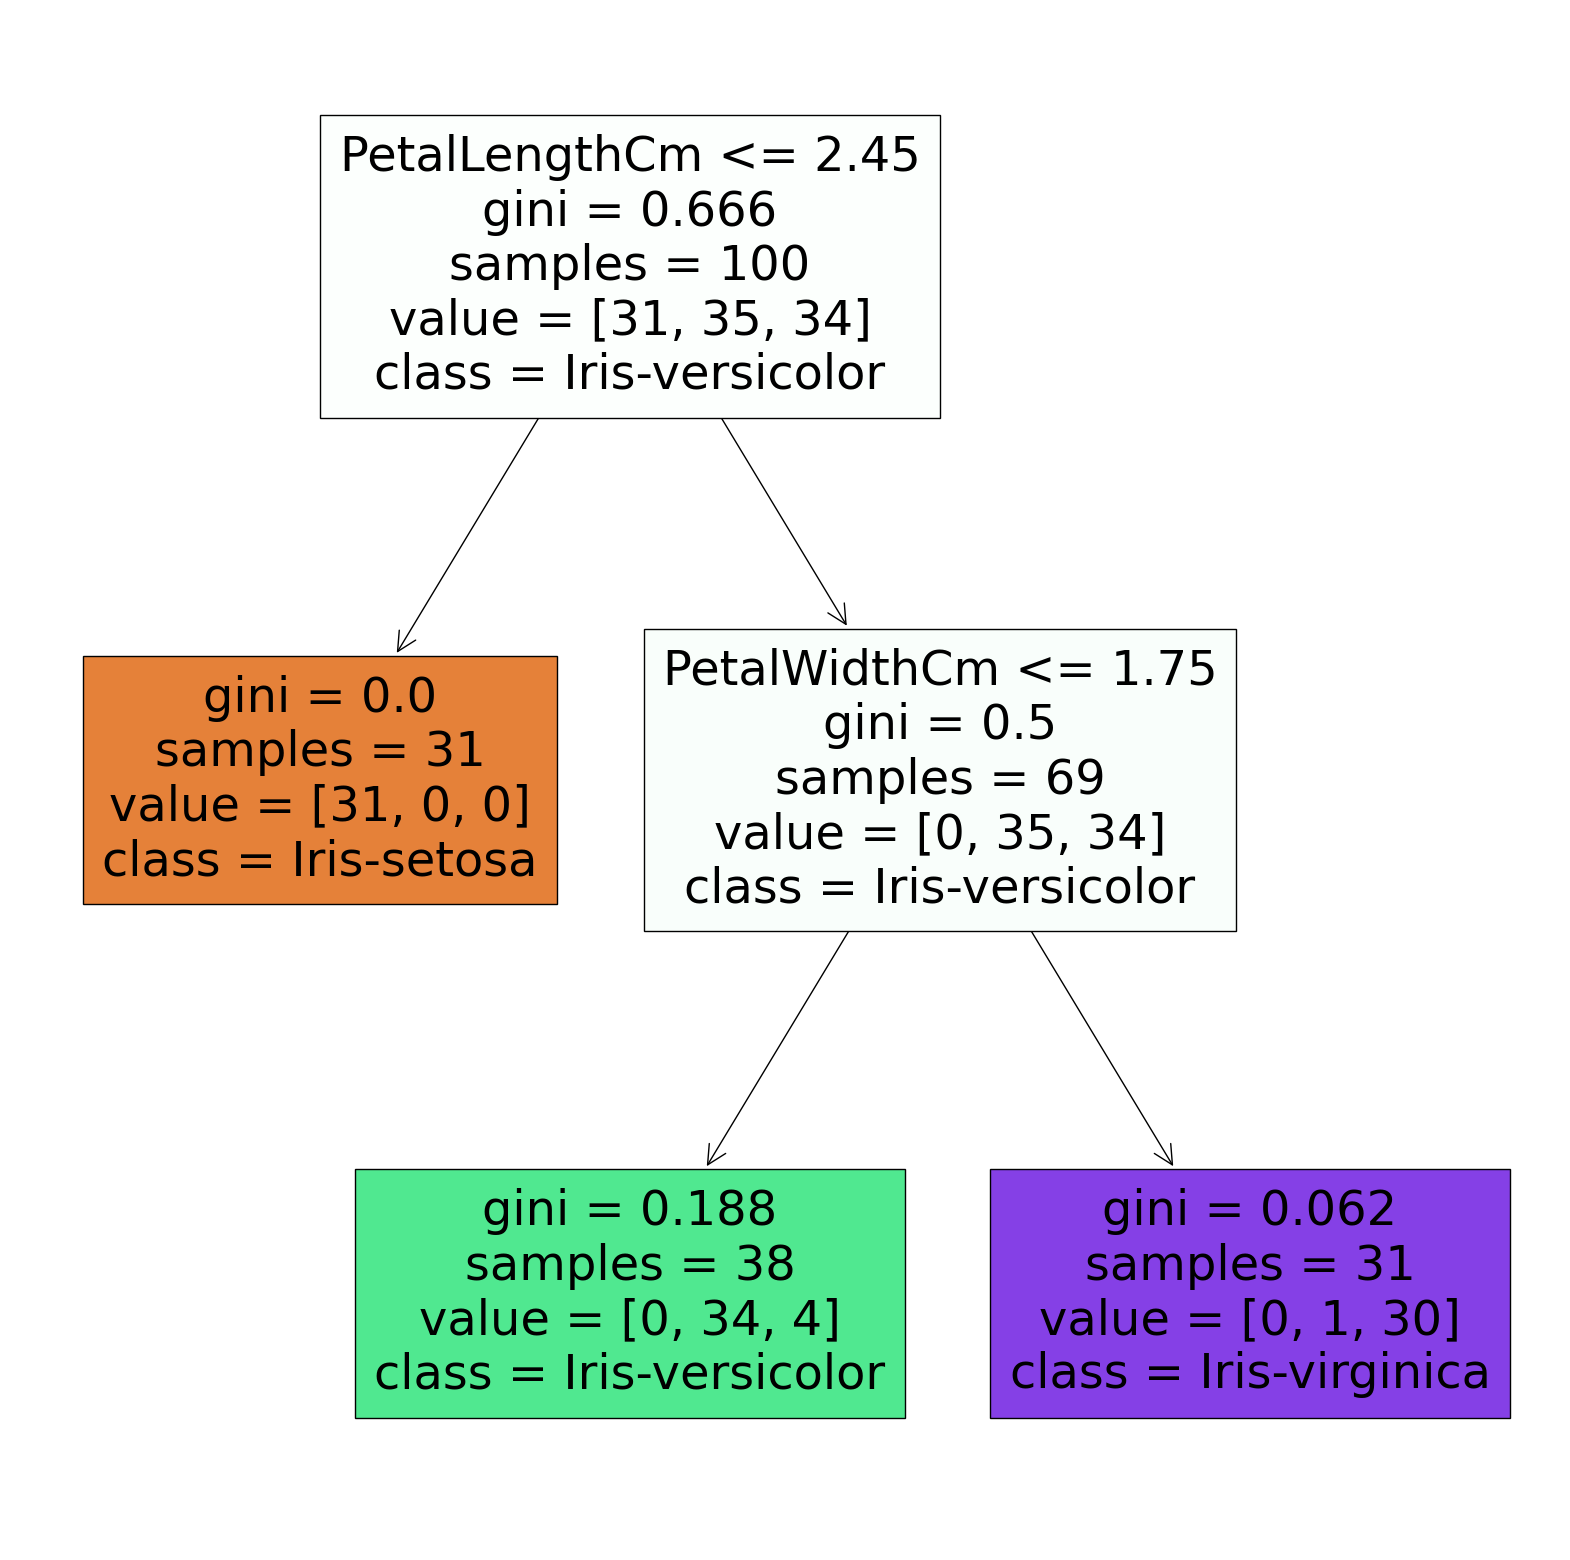

In [33]:
plt.figure(figsize=(20,20))

plot_tree(dt_model_ccp, feature_names = X_train.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

In [34]:
dt_model_ccp.score(X_train,y_train)

0.95

In [35]:
dt_model_ccp.score(X_test,y_test)

0.98

# Pre Prunning Using Hyper-Parameter Tuning (GridSearchCV)

In [36]:
# Create the parameter grid based on the results of random search 
params = {
    'splitter' : ["best", "random"],
    'max_depth': [*range(1,10,1)],
    'min_samples_split':[*range(2,15,1)],
    'min_samples_leaf': [*range(1,10,1)],
    'criterion': ["gini", "entropy"]
}

#### Best Parameters and their limit:-

    
* min_depth = lower than 10


* min_sample_split = lower than 20


These values are vary according size of the data. 

#### Difference betwen min_sample_split and min_sample_leaf:-


* min_samples_split is the minimum number of samples required to split an internal node. When a node has fewer samples than min_samples_split, it will not be split, and the splitting process will stop. Increasing the min_samples_split value will lead to a simpler model with fewer splits and larger nodes.


* min_samples_leaf is the minimum number of samples required to be at a leaf node. When a node has fewer samples than min_samples_leaf, it will not be split, and the splitting process will stop. Increasing the min_samples_leaf value will lead to a simpler model with fewer splits and larger nodes.

#### Note:-
* The value of min_sample_split is high than min_sample_leaf to reduce overfitting.

In [37]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [3]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=4, scoring = "accuracy")

In [4]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [41]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 972 candidates, totalling 3888 fits
Wall time: 31.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=4)

In [42]:
grid_search.cv_results_

{'mean_fit_time': array([0.00808811, 0.00774556, 0.00800163, 0.00618756, 0.0050596 ,
        0.00419879, 0.00572097, 0.00250977, 0.00457692, 0.00404394,
        0.00254965, 0.00352538, 0.00302964, 0.00339907, 0.00413817,
        0.00251997, 0.00252008, 0.00250518, 0.00503904, 0.00478554,
        0.00363964, 0.00376248, 0.00391632, 0.00496155, 0.00634903,
        0.00415289, 0.00643313, 0.00375926, 0.00378197, 0.00457674,
        0.00506091, 0.00290489, 0.00453931, 0.00415367, 0.00616306,
        0.004511  , 0.00677377, 0.00741535, 0.00240511, 0.0062294 ,
        0.00736672, 0.00238097, 0.00669408, 0.00375837, 0.00415242,
        0.00253171, 0.00571823, 0.00490147, 0.00694442, 0.00616598,
        0.00608128, 0.00508469, 0.00415242, 0.00618762, 0.00381285,
        0.0057807 , 0.00567722, 0.00741071, 0.00602597, 0.00754237,
        0.00564224, 0.00667846, 0.00803316, 0.00629145, 0.00502867,
        0.0065428 , 0.00690663, 0.00755394, 0.00690657, 0.00466079,
        0.00466496, 0.00653332,

In [43]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008088,0.000000,0.002033,0.000000,gini,1,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.64,0.48,0.68,0.64,0.61,0.076811,905
1,0.007746,0.001657,0.001017,0.001017,gini,1,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.56,0.60,0.64,0.64,0.61,0.033166,905
2,0.008002,0.003559,0.004548,0.000538,gini,1,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.64,0.48,0.68,0.64,0.61,0.076811,905
3,0.006188,0.001912,0.004559,0.000639,gini,1,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.48,0.68,0.64,0.68,0.62,0.082462,902
4,0.005060,0.001096,0.002529,0.001921,gini,1,1,4,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.64,0.48,0.68,0.64,0.61,0.076811,905


In [44]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
117,0.006085,0.002454,0.000517,0.000895,gini,3,2,3,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.00,0.92,1.0,0.96,0.97,0.033166,1
713,0.005108,0.001412,0.003157,0.002089,entropy,5,2,4,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.00,0.88,1.0,1.00,0.97,0.051962,1
837,0.002506,0.002506,0.006265,0.002094,entropy,7,5,3,random,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",1.00,0.88,1.0,1.00,0.97,0.051962,1
877,0.006179,0.002278,0.005053,0.003583,entropy,8,3,2,random,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.96,0.96,1.0,0.96,0.97,0.017321,1
403,0.004454,0.002610,0.001255,0.002173,gini,8,5,2,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",1.00,0.88,1.0,0.96,0.96,0.048990,5


In [45]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                       splitter='random')

In [46]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [47]:
grid_search.predict(X_train)

array([1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 1,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2,
       2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

In [57]:
tree = DecisionTreeClassifier(criterion='gini',max_depth= 3,min_samples_leaf=2,splitter='random')

In [58]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, splitter='random')

In [59]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [60]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 0.9
Train Confusion Matrix:
[[26  5  0]
 [ 0 32  3]
 [ 0  2 32]]
--------------------------------------------------
Test Performance : 0.86
Test Confusion Matrix:
[[15  4  0]
 [ 0 13  2]
 [ 0  1 15]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.72      0.87      0.79        15
           2       0.88      0.94      0.91        16

    accuracy                           0.86        50
   macro avg       0.87      0.86      0.86        50
weighted avg       0.88      0.86      0.86        50



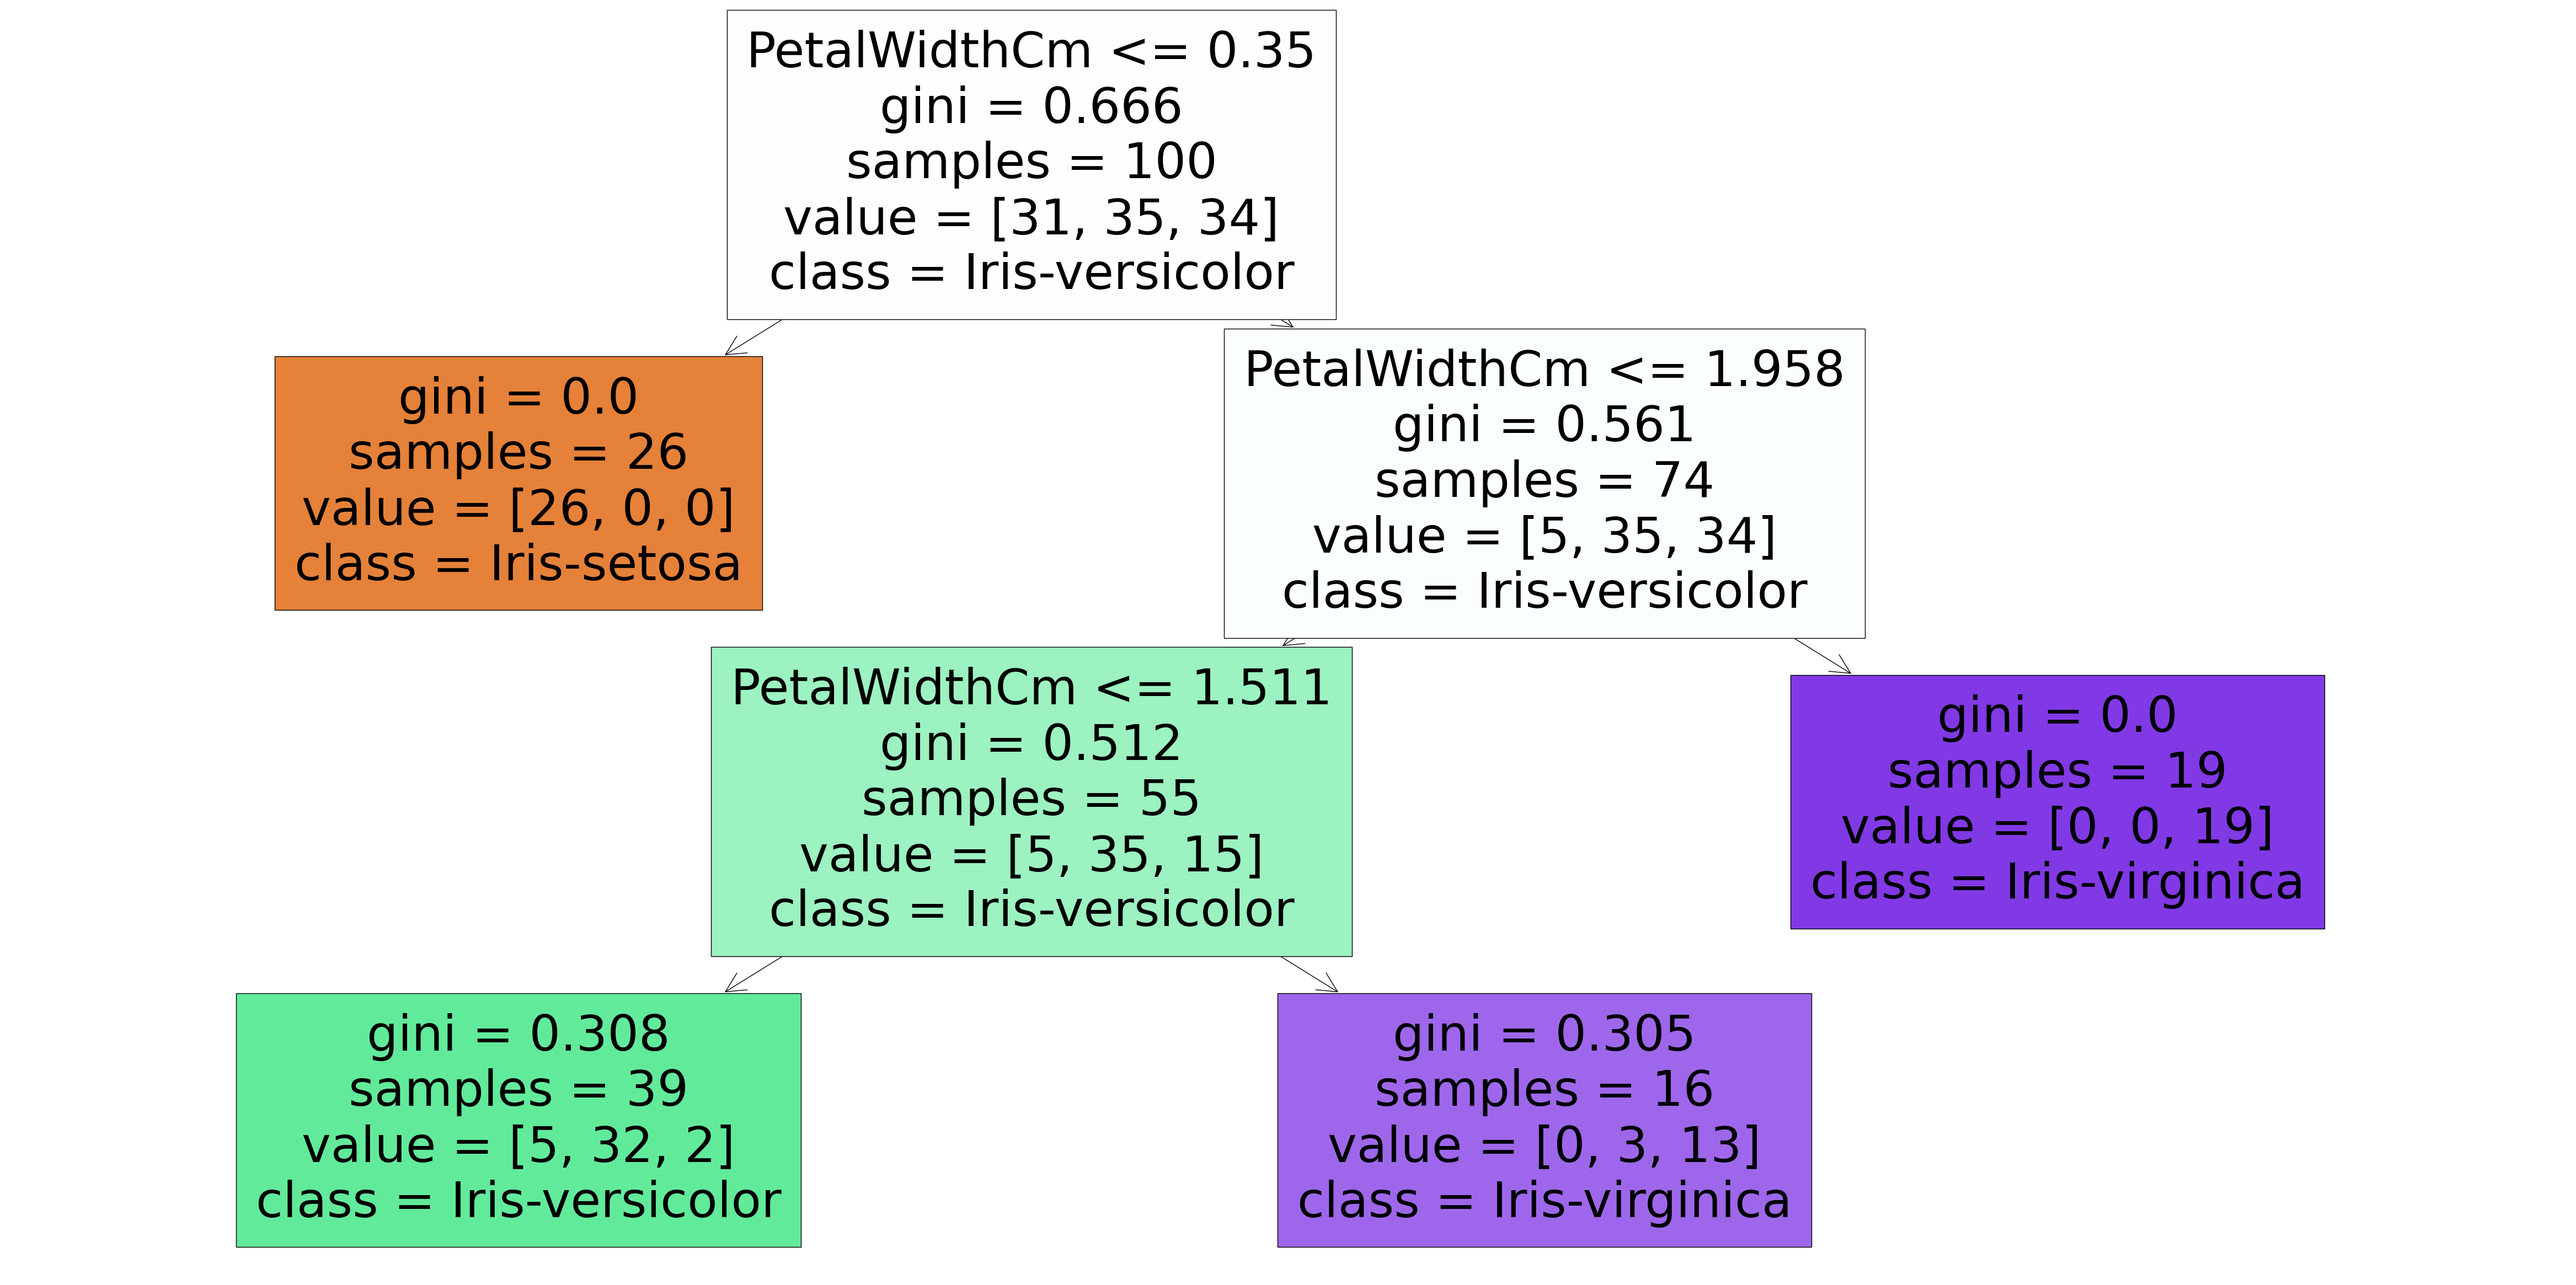

In [61]:
plt.figure(figsize=(60,30))

plot_tree(tree, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

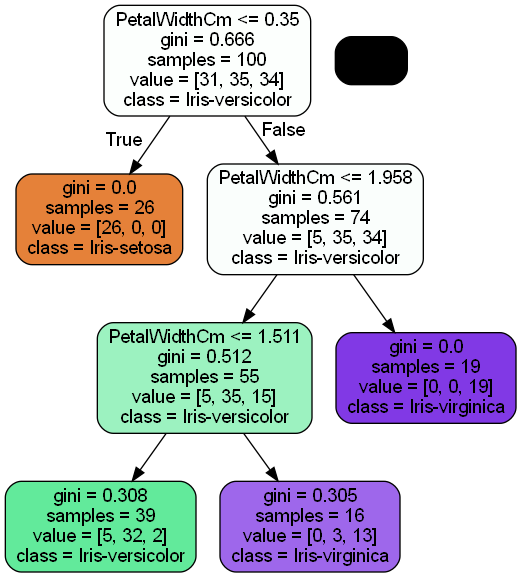

In [62]:
# plotting tree with max_depth=3

dot_data = StringIO()  

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#Image(graph.create_png(),width=800,height=900)

In [63]:
tree.feature_importances_

array([0., 0., 0., 1.])

In [64]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": tree.feature_importances_
})

In [65]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,PetalWidthCm,1.0
0,SepalLengthCm,0.0
1,SepalWidthCm,0.0
2,PetalLengthCm,0.0
